<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/Lab1_Where_in_the_Genome_Does_DNA_Replication_Begin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - Where in the Genome Does DNA Replication Begin?
## Secondary Title: Algorithm Warmup
Material and embedded lab.

Motivation and some exercises are variations on those available in Bioinformatics Algorithms: An Active-Learning Approach by Phillip Compeau & Pavel Pevzner.

## Genome Replication
* One of most important tasks carried out in the cell.
* Must be carried out before cell division
* In 1953, James Watson and Francis Crick ended their paper on DNA double helix with:

"It has not escaped our notice that the specific pairing we have postulated immediately suggests a possible copying mechanism for the genetic material."

<img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/watson-and-crick-a-barrington-brown-and-photo-researchers.jpg" alt="drawing" width="200"/>

## Let's talk some biology
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Difference_DNA_RNA-EN.svg/1200px-Difference_DNA_RNA-EN.svg.png" width="600"/>



## DNA and RNA code
* Not a binary alphabet
* DNA alphabet: AGCT
* RNA alphabet: AGCU
* Nucleotides are complementary (A binds to T and G binds to C)
* Replication begins at replication origin (*ori*)
* **Binary is a base-2 system, what is DNA/RNA?**

## Why should I care?
There are molecular copy machines known as DNA polymerases that start by locating a *ori*. Some gene therapy methods use genetically engineered mini-genomes, which are called **viral vectors** because they are able to penetrate cell walls. Viral vectors carry artificial genes that have been used to engineer frost-resistant tomatoes and pesticide-resistant corn. In 1990, gene therapy was successfully performed on humans when it saved the life of a four year old girl suffered from Severe Combined Immunodeficiency Disorder. To ensure the treatment works, scientists must know the location of *ori* and avoid disrupting this site.

## Looking for *ori*
Verified *ori* of Vibrio cholerae, the bacterium that causes cholera (~500 nucleotides):
<pre>
atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc
</pre>

## DnaA box
* There is a hidden message in *ori* that orders the cell to begin replication here.
* We know that the initiation of replication is mediated by a protein called **DnaA** that looks for a short segment within *ori*.
* This short segment is known as a *DnaA box*
* Biologists want to find this hidden message, but is that clearly defined enough for us CS/STAT/MATH/EGR folks?

## Counting words
* Turns out that the patterns in our DNA are not random.
* Some patterns are more common than others.
* Biologically speaking this helps because certain protins can only bind to DNA if a specific string of nucleotides is present and if that string is more prevelant then we have a greater chance of success (and less likely a mutation will cause problems).
* We are going to refer to a *k*-mer as a string of length *k*.

### Why? Why? Why?
"Nothing in biology makes sense except in the light of evolution." - Theodosius Dobzhansky

We are looking for surprisingly frequent substrings (contiguous strings appearing within) this *ori*.
<pre>
atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaac
ctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgacca
cggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgactt
gtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggatt
acgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttagga
tagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaat
tgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaag
atcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtt
tccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc
</pre>
Are there any substrings that occur more frequent than others?

Before we go about searching for unknown substrings, we'll write a function that counts the number of occurances of a specific substring.

**Exercise 1.**
A *k*-mer is a string of length ``k``. For this exercise, define a function ``count(text, pattern)`` as the number of times that a k-mer ``pattern`` appears as a substring of ``text``. For example,

For example:
<pre>
count("ACAACTATGCATACTATCGGGAACTATCCT","ACTAT")=3.
</pre>
Please note that count("CGATATATCCATAG", "ATA") is equal to 3 (not 2) since we should account for overlapping occurrences of ``pattern`` in ``text``.

In [1]:
def count(text,pattern):
    return sum(text[i:].startswith(pattern) for i in range(len(text)))

In [2]:
count("ACAACTATGCATACTATCGGGAACTATCCT","ACTAT")

3

### A word about embedded lab questions
In general, I will skip over most lab questions when recording and presenting unless I want them to be used as part of the lecture/discussion.

**Exercise 2.** Find the most frequent *k*-mers in a string.
* Input: A string ``text`` and an integer ``k``.
* Output: All most frequent *k*-mers in ``text`` and their count.
* Requirements: Do not use a dictionary/map

In [3]:
def frequent_words(text,k):
    counts = []
    all_patterns = []
    for i in range(len(text)):
        current_pattern = text[i:i+k]
        if current_pattern in all_patterns:
            counts[all_patterns.index(current_pattern)] += 1
        else:
            all_patterns.append(current_pattern)
            counts.append(1)
    max_count = max(counts)
    frequent_patterns = [el for i,el in enumerate(all_patterns) if counts[i] == max_count]
    return frequent_patterns,max_count

In [4]:
print(frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",5))
print(frequent_words("ACAACTATGCATACTATCGGGAACTATCCT",4))

(['ACTAT'], 3)
(['ACTA', 'CTAT'], 3)


**Question 1.**
What is the Big-O of frequent words? Define $|text|$ as the length of text. Assume the unit of measurement is comparing a single charater (i.e., comparing ABC to DEF costs 3 units).

A. $|\mbox{text}|^2$

B. $|\mbox{text}|^2*k$

C. $k^2$

In [5]:
def question_1(answer):
    answers = {
        "A": False,
        "B": True,
        "C": False
    }
    try:
        return answers[answer]
    except:
        return "Not a valid answer"

answer_question_1 = lambda: question_1("B")
answer_question_1()

True

### Now let's look at the *ori* and see what 9-mers appear

In [6]:
text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
frequent_words(text,9)

(['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat'], 3)

Notice anything interesting about the sequences?

As previously stated, nucleotides only bind to their complement, so A and T bind and G and C bind. It is also true that DNA is read in specific direction. Very much in the same way we read left to right. DNA is read from what is called the 5' end to the 3' end.

<img src="https://image.slidesharecdn.com/dna-replication-lin-140210083429-phpapp02/95/dna-replicationlin-4-638.jpg?cb=1392021295" width=400/>

So we can now understand and look for something very important called a reverse complement. The definition of which is right there in the name. ACTG is the reverse complement of CAGT. Let's now write a simple funciton to find the reverse complement.

**Exercise 3.** Write a function that find the reverse complement of a DNA sequence.
* Input: A string ``text`` representing DNA.
* Output: The reverse complement of ``text``.

In [7]:
def reverse_complement(text):
    text = text[::-1].lower()
    chars = {'a':'t','t':'a','c':'g','g':'c'}
    rev_comp = map(lambda c : chars[c], text)
    return ''.join(rev_comp)

In [8]:
reverse_complement("cagt")

'actg'

### Back to our 9-mers

In [9]:
solutions = frequent_words(text,9)
print(solutions)
print("Reverse complement of first 9-mer:",reverse_complement(solutions[0][0]))

(['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat'], 3)
Reverse complement of first 9-mer: cttgatcat


What is interesting about the reverse complement of the first 9-mer?

### Writing faster code
**Exercise 4.** Let's now write faster code that produces a frequency map.
* Input: A string ``text`` representing DNA and integer ``k``.
* Output: a frequency map (Python dictionary) that maps every pattern of size ``k`` to the number of times that pattern occurs.

In [10]:
def frequency_table(text,k):
    freq_map = {}
    n = len(text)
    for i in range(n-k+1):
        pattern = text[i:i+k]
        if pattern in freq_map:
            freq_map[pattern] += 1
        else:
            freq_map[pattern] = 1
    return freq_map

In [11]:
freq_map = frequency_table(text,3)
print(freq_map)

{'atc': 21, 'tca': 17, 'caa': 12, 'aat': 10, 'atg': 15, 'tga': 25, 'gat': 21, 'aac': 3, 'acg': 7, 'cgt': 5, 'gta': 4, 'taa': 6, 'aag': 12, 'agc': 10, 'gct': 10, 'ctt': 17, 'ttc': 12, 'tct': 16, 'cta': 3, 'gca': 3, 'cat': 16, 'agg': 5, 'ggt': 4, 'gtg': 5, 'tgc': 8, 'ctc': 14, 'cac': 5, 'aca': 7, 'cag': 2, 'agt': 2, 'gtt': 11, 'ttt': 16, 'tta': 10, 'tat': 6, 'tcc': 7, 'cca': 8, 'acc': 5, 'cct': 9, 'ctg': 10, 'gag': 6, 'tgg': 4, 'gga': 7, 'gac': 13, 'aga': 8, 'ata': 7, 'tag': 5, 'gtc': 1, 'tcg': 7, 'ttg': 17, 'tgt': 10, 'tac': 7, 'act': 9, 'cgg': 5, 'gaa': 7, 'aaa': 4, 'att': 11, 'ggc': 3, 'gcc': 8, 'cgc': 4, 'gcg': 4, 'ggg': 1, 'cga': 7, 'ccg': 3, 'ccc': 1}


In [12]:
# I'm only using pandas here so the output is reasonable, you can remove it of course and see the full dictionary
import pandas as pd
pd.Series(frequency_table(text,3))

,0
atc,21
tca,17
caa,12
aat,10
atg,15
...,...
gcg,4
ggg,1
cga,7
ccg,3


### Write better frequent words
**Exercise 5.** Write a function that finds the frequent patterns using a dictionary/map.
* Input: A string ``text`` representing DNA and integer ``k``.
* Output: All most frequent *k*-mers in ``text`` and their count.
* Requirements: Use your frequency_table function (i.e., use the dictionary).

In [13]:
def better_frequent_words(text,k):
    frequent_patterns = []
    freq_map = frequency_table(text,k)
    max_count = max(freq_map.values())
    frequent_patterns = [k for k,v in freq_map.items() if v == max_count]
    return frequent_patterns,max_count

In [14]:
better_frequent_words(text,9)

(['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat'], 3)

### Clump Finding Problem
* Please read the section in the texbook on the clump finding problem
* Even if we solve the clump finding problem, we still have an issue
* Specifically, for the *E. coli* genome we find hundreds of different 9-mers forming (500,3)-clumps
* This makes it absolutely unclear which of these 9-mers might represent a DnaA box in the bacterium’s *ori* region.
* Please read the next sections entitled "The Simplest Way to Replicate DNA" and "Asymmetry of Replication". Take a stab at the biology. Chat with me in Slack about what you find confusing and interesting. We don't have exams and the details of biochemistry at this point aren't as important.

### Statistics of the Foward and Reverse Half-Strands
* The most important consequent for us from the discussion of DNA replication is that we now have four pieces
    1. Forward half-strand x 2
    2. Reverse half-strand x 2

<img src="http://bioinformaticsalgorithms.com/images/Replication/half_strands.png" width=400>



### Why does this matter?
Consider the genome of *Thermotoga petrophila*. If we count the nucleotides in the forward and reverse half strands, then we get the following:

<img src="http://bioinformaticsalgorithms.com/images/Replication/forward_reverse_nucleotide_counts.png" width=400>

Notice that the number of C's and G's is different in the reverse and forward half-strand. Why is this?

"It turns out that we observe these discrepancies because cytosine (C) has a tendency to mutate into thymine (T) through a process called deamination. Deamination rates rise 100-fold when DNA is single-stranded, which leads to a decrease in cytosine on the forward half-strand. Also, since C-G base pairs eventually change into T-A base pairs, deamination results in the observed decrease in guanine (G) on the reverse half-strand (recall that a forward parent half-strand synthesizes a reverse daughter half-strand, and vice-versa)." - Bioinformatics Algorithms 3rd Edition

### Minimum skew problem
We can use this statistic to find the *ori*. We need to define We define $Skew_i(Genome)$ as the difference between the total number of occurrences of G and the total number of occurrences of C in the first $i$ nucleotides of Genome.

Note that we can compute $Skew_i(Genome)$ incrementally.  If the next nucleotide is G, then $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$ + 1; if this nucleotide is C, then $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$ – 1; otherwise, $Skew_{i+1}(Genome)$ = $Skew_i(Genome)$.

**Exercise 6:** Compute the skew at every position of a Genome

Input: A DNA string Genome.

Output: An array that computes the $Skew_i(Genome)$. You can assume $Skew_0(Genome)$=0

In [15]:
def skew(genome):
    skews = [0]
    for n in genome:
        n = n.lower()
        if n == 'c':
            skews.append(skews[-1] - 1)
        elif n == 'g':
            skews.append(skews[-1] + 1)
        else:
            skews.append(skews[-1])
    return skews

### Reading in the *E coli* genome
I'll do this for you.

In [16]:
import pandas as pd
data = pd.read_table("http://bioinformaticsalgorithms.com/data/realdatasets/Rearrangements/E_coli.txt",header=None)
genome = data.values[0,0]

In [17]:
skews = skew(genome)

In [18]:
# Again I'm using pandas because the display would be horrible otherwise.
# I will either give you the pandas code or teach you that pandas/numpy code
skews = pd.Series(skew(genome))
skews

,0
0,0
1,0
2,1
3,0
4,0
...,...
4639671,-2630
4639672,-2630
4639673,-2630
4639674,-2630


<Axes: >

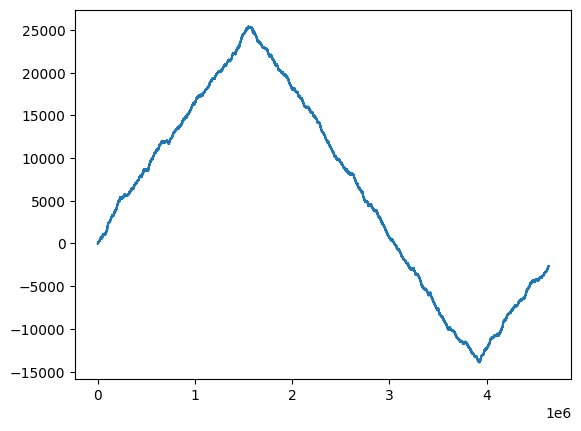

In [19]:
%matplotlib inline
skews.plot.line()

Where do you think the *ori* is located?

In [20]:
print('Position:',skews.idxmin()+1)

Position: 3923621


In [ ]:
# Don't forget to push!